In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
H1b = pd.read_excel('H-1B_Disclosure_Data_FY2019.xlsx')

In [3]:
H1b.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,APPX_A_FIELD_OF_STUDY_3,APPX_A_DATE_OF_DEGREE_3,APPX_A_NO_OF_EXEMPT_WORKER_4,APPX_A_NAME_OF_INSTITUTION_4,APPX_A_FIELD_OF_STUDY_4,APPX_A_DATE_OF_DEGREE_4,APPX_A_NO_OF_EXEMPT_WORKER_5,APPX_A_NAME_OF_INSTITUTION_5,APPX_A_FIELD_OF_STUDY_5,APPX_A_DATE_OF_DEGREE_5
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,NaT,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",CANDACE ROMERO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,NaT,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,NaT,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
clean = H1b.dropna(axis = 1, thresh= H1b.shape[0] / 3)
clean = clean.query('VISA_CLASS == "H-1B"')
clean = clean.query('CASE_STATUS != "WITHDRAWN"')
clean.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",800 GESSNER ROAD,HOUSTON,...,36.00,0.00,Hour,N,HOUSTON,TX,FL,77024,N,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,...,50000.00,0.00,Year,N,Richardson,TX,TX,75080,N,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,...,207777.00,0.00,Year,N,Richardson,Dallas,TX,75080,N,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,4705 EDGEWOOD DRIVE,NEW BERN,...,7.95,7.95,Hour,N,New Bern,Craven,NC,28562,N,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",2820 PAN AMERICAN BLVD,NORTH PORT,...,8.46,10.00,Hour,Y,NORTH PORT,florida,FL,34287,N,N


## EDA PART 1. Individual variables 

## 1. Case Status for H1-B applications (CASE_STATUS)

In [5]:
clean['CASE_STATUS'].describe()

count        629857
unique            3
top       CERTIFIED
freq         584269
Name: CASE_STATUS, dtype: object

In [6]:
clean['CASE_STATUS'].unique()

array(['DENIED', 'CERTIFIED', 'CERTIFIED-WITHDRAWN'], dtype=object)

In [7]:
clean['CASE_STATUS'].value_counts(normalize=True)

CERTIFIED              0.927622
CERTIFIED-WITHDRAWN    0.064176
DENIED                 0.008202
Name: CASE_STATUS, dtype: float64

In [8]:
case_status = clean['CASE_STATUS'].value_counts(normalize=True)

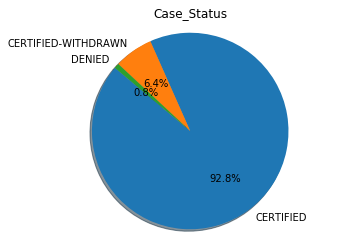

In [9]:
plt.pie(case_status, labels = ["CERTIFIED","CERTIFIED-WITHDRAWN","DENIED"],
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Case_Status")
plt.axis('equal')
plt.show()

CASE_STATUS shows whether an application has the eligibility to pass into the lottery part of H1-B selection. This is the very first selection process, which measures a candidate in several ways, including whether he requires a prestigious degree, whether the function of the job in the application reflects his expertise (more specifically, his degree), and whether this employer holds the eligibility to hire H1B employees.

From the summary of the data, we can see that among the total 629857 entries, there are three categories, 'DENIED', 'CERTIFIED', 'CERTIFIED-WITHDRAWN', each representing a status for whether a certain application is certified or not. The category with most entries is "CERTIFIED", representing 92.8% of the total entries; the category with least entries is "DENIED", only 0.8% of total entries. Therefore, we can conclude from the graph above that most of the applications get certified. We are interested in why there are DENIED applications, and, more specifically, whether other variables in the dataset affects an applicant's eligibility of getting CERTIFIED.

## 2. Employment Start & End Date (EMPLOYMENT_END_DATE & EMPLOYMENT_START_DATE)

In [10]:
clean.EMPLOYMENT_END_DATE.describe()

count                  629857
unique                   1603
top       2022-08-31 00:00:00
freq                    14164
first     2017-09-01 00:00:00
last      2023-12-31 00:00:00
Name: EMPLOYMENT_END_DATE, dtype: object

In [11]:
clean.EMPLOYMENT_START_DATE.describe()

count                  629857
unique                   1547
top       2019-09-01 00:00:00
freq                    18951
first     2014-09-01 00:00:00
last      2020-03-31 00:00:00
Name: EMPLOYMENT_START_DATE, dtype: object

EMPLOYMENT_END_DATE and EMPLOYMENT_START_DATE represent for the end and start date for the applicant's employment contract in this company in the application. The range of EMPLOYMENT_END_DATE is from 2017-09-01 to 2023-12-31, with the entry of top frequencies being 2022-08-31; and the range of EMPLOYMENT_START_DATE is from 2014-09-01 to 2020-03-31, with the entry of top frequencies being 2019-09-01.

We are interested in exploring how often employers/applicants update their H1-B. We can indicate this time interval of update from the duration of the employment for these applications. Therefore, we need to take the difference between EMPLOYMENT_START_DATE and EMPLOYMENT_END_DATE.

In [12]:
clean['Duration'] = clean.EMPLOYMENT_END_DATE - clean.EMPLOYMENT_START_DATE

In [13]:
clean.groupby('Duration')['CASE_STATUS'].count()

Duration
-1 days      4
1 days       7
2 days       2
3 days       2
4 days       7
            ..
1112 days    1
1126 days    1
1165 days    1
1357 days    1
1460 days    5
Name: CASE_STATUS, Length: 1105, dtype: int64

Here, the -1 days caught our eyes. Why is there -1 days if all EMPLOYMENT_END_DATE is later than EMPLOYMENT_START_DATE?

In [14]:
clean[clean['Duration'] == '-1 days +00:00:00']

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B,Duration
213743,I-200-19064-915612,DENIED,2019-03-05,2019-03-11,H-1B,2019-09-01,2019-08-31,VSION TECHNOLOGIES INC.,507 DENALI PASS SUITE 602,CEDAR PARK,...,116000.0,Year,Y,Princeton,Mercer,NJ,08540,N,Y,-1 days
265353,I-200-19228-946322,DENIED,2019-08-26,2019-08-27,H-1B,2019-08-23,2019-08-22,"SERVICENOW, INC.",2225 LAWSON LANE,SANTA CLARA,...,140000.0,Year,N,Santa Clara,Santa Clara,CA,95054,N,NaN,-1 days
320518,I-200-19158-430239,DENIED,2019-06-07,2019-06-11,H-1B,2019-11-29,2019-11-28,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,MOUNTAIN VIEW,...,204000.0,Year,N,Mountain View,Santa Clara,CA,94043,N,NaN,-1 days
491745,I-200-19260-866082,DENIED,2019-09-17,2019-09-18,H-1B,2019-09-17,2019-09-16,CIBER GLOBAL LLC,3270 WEST BIG BEAVER ROAD,TROY,...,NaN,Year,N,Baton Rouge,East Baton Rouge Parish,LA,70802,N,NaN,-1 days


These data don't make sense and there must be something wrong with the entries for the EMPLOYMENT_START_DATE and EMPLOYMENT_END_DATE (this is probably why they got denied), so we drop these entries.

In [15]:
clean_timediff = clean[clean['Duration'] != '-1 days +00:00:00']

Text(0.5, 1.0, 'Frequency for Duration of Employment')

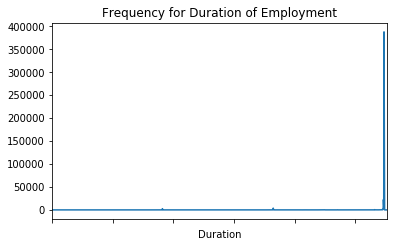

In [16]:
clean_timediff.groupby('Duration')['CASE_STATUS'].count().plot()
plt.title("Frequency for Duration of Employment")

From the frequency graph, most of entries concentrate in a certain narrow interval. So we further narrow down the range of employment duration.

In [17]:
print(clean_timediff.Duration.describe())

count                       629853
mean     1067 days 03:48:01.135373
std       126 days 07:42:46.779916
min                1 days 00:00:00
25%             1095 days 00:00:00
50%             1095 days 00:00:00
75%             1096 days 00:00:00
max             1460 days 00:00:00
Name: Duration, dtype: object


In [18]:
len(clean_timediff.groupby('Duration')['CASE_STATUS'].count())

1104

In [19]:
clean_timediff.groupby('Duration')['CASE_STATUS'].count().idxmax()

Timedelta('1095 days 00:00:00')

In [20]:
clean_timediff.groupby('Duration')['CASE_STATUS'].count().max()

388176

In [21]:
(clean_timediff.groupby('Duration')['CASE_STATUS'].count().max())/clean_timediff.shape[0]*100

61.629618339517314

The summary of time difference between employment start and end date illustrates that the application renewal time interval range from 1 days to 1460 days (4 years). The time interval with the most entries (61.63% of total entries) is 1095 days (3 years), which means that usually the working contract between an international student and the company lasts three years, so that usually people need to renew their H1-B visa every three years.

## 10. Application submitted date and Decision announced date (CASE_SUBMITTED, DECISION_DATE)

In [22]:
clean.CASE_SUBMITTED.describe()

count                  629857
unique                   1300
top       2019-03-13 00:00:00
freq                    10885
first     2014-03-04 00:00:00
last      2019-09-28 00:00:00
Name: CASE_SUBMITTED, dtype: object

In [23]:
clean.DECISION_DATE.describe()

count                  629857
unique                    348
top       2019-03-21 00:00:00
freq                    17412
first     2018-10-01 00:00:00
last      2019-09-30 00:00:00
Name: DECISION_DATE, dtype: object

CASE_SUBMITTED and DECISION_DATE represent for the date the application was submitted and the date when the Chicago National Processing Center makes a decision on whether this application gets certified. The range of CASE_SUBMITTED is from 2014-03-04 to 2019-09-28, with the entry of top frequencies being 2019-03-13; and the range of EMPLOYMENT_START_DATE is from 2018-10-01 to 2019-09-30, with the entry of top frequencies being 2019-03-21.

We are interested in which time of the year does the most of the employers apply for H1-B visas for their employees, and which time of the year does most of the application certification get decided? 

In [24]:
clean['CASE_SUBMITTED_MONTH']=clean['CASE_SUBMITTED'].dt.month

In [25]:
clean['CASE_SUBMITTED_MONTH'].value_counts(normalize=True)

3     0.314562
2     0.131428
4     0.074396
5     0.065985
1     0.062438
6     0.058917
8     0.057804
7     0.054554
9     0.049932
10    0.047563
11    0.042691
12    0.039731
Name: CASE_SUBMITTED_MONTH, dtype: float64

Text(0.5, 1.0, 'CASE_SUBMITTED_MONTH')

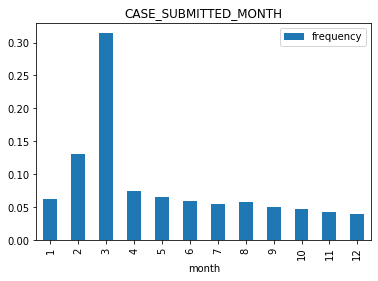

In [26]:
CASE_SUBMITTED_MONTH = clean['CASE_SUBMITTED_MONTH'].value_counts(normalize=True).reset_index()
CASE_SUBMITTED_MONTH.columns = ["month","frequency"]
CASE_SUBMITTED_MONTH = CASE_SUBMITTED_MONTH.sort_values('month')
CASE_SUBMITTED_MONTH.plot(kind='bar',x='month',y='frequency')
plt.title("CASE_SUBMITTED_MONTH")

In [27]:
clean['DECISION_DATE_MONTH']=clean['DECISION_DATE'].dt.month

In [28]:
clean['DECISION_DATE_MONTH'].value_counts(normalize=True)

3     0.310896
2     0.106494
4     0.086577
5     0.068725
8     0.062005
7     0.061400
6     0.057180
1     0.053314
9     0.052529
10    0.050959
12    0.044967
11    0.044955
Name: DECISION_DATE_MONTH, dtype: float64

Text(0.5, 1.0, 'DECISION_DATE_MONTH')

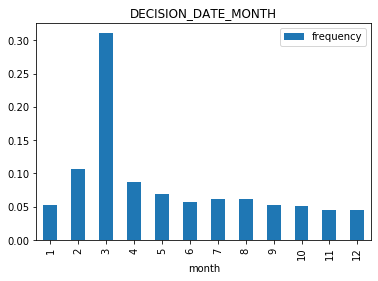

In [29]:
DECISION_DATE_MONTH = clean['DECISION_DATE_MONTH'].value_counts(normalize=True).reset_index()
DECISION_DATE_MONTH.columns = ["month","frequency"]
DECISION_DATE_MONTH = DECISION_DATE_MONTH.sort_values('month')
DECISION_DATE_MONTH.plot(kind='bar',x='month',y='frequency')
plt.title("DECISION_DATE_MONTH")

The results from CASE_SUBMITTED illustrates the highest frequency during March. Therefore, the month that employers usually submit the application for H1-B is March. This may serve as an indicator for international applicants to arrange their recruitment timeline ahead of time (before March), so that they can make sure they get hired before the H1-B submission busy season, and don't miss out this opportunity. 

The results from DECISION_DATE tells us usually when the decisions are made during March. Interestingly, the distribution of decision date and the submission date is rather similar.

However, besides understanding the two dates themselves, we are also interested in the question that, after employers submitting the application, how long does it usually take for the Chicago National Processing Center to process the applications and make the decision for certification?

To make further analysis, we need to take the difference between these two dates.

In [30]:
clean['DECISION_TIME_INTERVAL'] = clean.DECISION_DATE - clean.CASE_SUBMITTED

In [31]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count()

DECISION_TIME_INTERVAL
0 days           3
1 days         760
2 days         942
3 days         464
4 days       96027
             ...  
1275 days        1
1331 days        3
1371 days        2
1440 days        1
1827 days        1
Name: CASE_STATUS, Length: 1270, dtype: int64

Here, just like what we inspected above, when we are analyzing EMPLOYMENT_END_DATE and EMPLOYMENT_START_DATE, there is something odd with the time differences, which shows 0 days. How can one get decided to be certified or not on the same day of submitting the application? 

In [32]:
clean[clean['DECISION_TIME_INTERVAL'] == '0 days +00:00:00']

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B,Duration,CASE_SUBMITTED_MONTH,DECISION_DATE_MONTH,DECISION_TIME_INTERVAL
567726,I-200-19204-056827,DENIED,2019-07-24,2019-07-24,H-1B,2019-07-23,2022-07-23,DATA SOLUTIONS INC.,"28345 BECK ROAD, SUITE 406",WIXOM,...,Cupertino,Santa Clara,CA,95014,N,NaN,1096 days,7,7,0 days
633189,I-200-19246-529324,DENIED,2019-09-04,2019-09-04,H-1B,2019-09-04,2022-09-04,ERNST & YOUNG U.S.LLP,200 PLAZA DRIVE,SECAUCUS,...,Louisville,Jefferson,KY,40202,N,NaN,1096 days,9,9,0 days
662351,I-200-19198-968145,DENIED,2019-08-08,2019-08-08,H-1B,2019-07-22,2022-07-22,ERNST & YOUNG U.S. LLP,200 PLAZA DRIVE,SECAUCUS,...,Bellevue,King,WA,98008,N,NaN,1096 days,8,8,0 days


Looks like all three of them are denied, meaning that they got rejected the same day they submitted the application, probably because they didn't even pass the machine selection process or missed some crucial documents to make them immediately ineligible after submission.

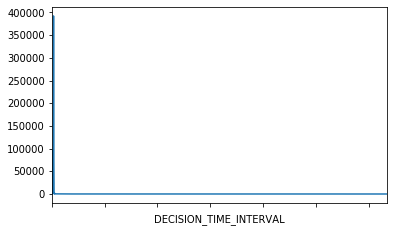

In [33]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().plot()

From the frequency graph, most of entries concentrate in a certain narrow interval. So we further narrow down the range of decision time interval.

In [34]:
print(clean.DECISION_TIME_INTERVAL.describe())

count                      629857
mean      29 days 07:00:43.581305
std      123 days 19:01:18.165148
min               0 days 00:00:00
25%               6 days 00:00:00
50%               6 days 00:00:00
75%               6 days 00:00:00
max            1827 days 00:00:00
Name: DECISION_TIME_INTERVAL, dtype: object


In [35]:
len(clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count())

1270

In [36]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().idxmax()

Timedelta('6 days 00:00:00')

In [37]:
clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().max()

392297

In [38]:
(clean.groupby('DECISION_TIME_INTERVAL')['CASE_STATUS'].count().max())/clean.shape[0]*100

62.283502445793246

The summary of time difference between application submitted date and decision date illustrates that the decision time interval range from 0 days to 1827 days (5 years). The time interval with the most entries (62.28% of total entries) is 6 days, which means that usually after 6 days of submission will the decision on certification be made. This decision period is really short, showing that Chicago National Processing Center holds a relatively high efficiency of processing H1-B application certification, so the applicants will be notified shortly (usually within a week) of their certification status after submitting the applications.

## EDA PART 2. Relationship between variables

## 2. Time pattern for H1-B submission of different industries (CASE_SUBMITTED vs SOC_CODE)

From the analysis in EDA PART 1 individual variable analysis section 10, we've investigated the usual time interval between application submission date and decision date. However, as international students, we are also interested to know: when do different industries usually submit their H1-B applications? Are there certain industries submit their applications earlier than others? Probably the answers can provide guidance for students pursuing careers in those industries to arrange their recruitment timeline earlier to make sure that they catch up with the H1-B submission time pattern, since most companies only submit H1-B applications during a concentrated time interval each year, together for all employees who need this type of visa. 

In order to seperate different industries, we extract the first two digits of SOC_CODE, with a total of 55 numbers representing 55 different industries according to the Standard Occupational Classification Manual published by the US Executive Office of the President of the United States.

In [39]:
clean['INDUSTRY_CODE'] = clean.SOC_CODE.str[0:2]

In [40]:
clean.INDUSTRY_CODE.unique()

array(['17', '19', '25', '39', '31', '49', '29', '13', '43', '11', '47',
       '37', '35', '27', '45', '21', '51', '41', '23', '15', '53', '12',
       '33', nan, 'OP'], dtype=object)

In [41]:
len(clean.INDUSTRY_CODE.unique())

25

The INDUSTRY_CODE was selected from SOC_CODE, which should be numbers from 1 to 55. However, here we saw nan and "OP". We are curious about what the data means. 

In [42]:
clean.query('INDUSTRY_CODE == "OP"')['SOC_CODE']

487525    OPERATIONS RESEARCH ANALYSTS
Name: SOC_CODE, dtype: object

This entry is incorrect, where the SOC_NAME was mistakenly input into SOC_CODE, so we drop this row.

In [43]:
clean_socright = clean.query('INDUSTRY_CODE != "OP"')

Now we investigate the nan in the INDUSTRY_CODE.

In [44]:
clean_socright[np.isnan(clean_socright.INDUSTRY_CODE.astype(float))]['SOC_CODE']

400045    NaN
427159    NaN
435477    NaN
460681    NaN
Name: SOC_CODE, dtype: object

The INDUSTRY_CODE which appears to be nan all have NaN in the original data SOC_CODE. Therefore, we drop these entries to make the data cleaner.

In [45]:
clean_socright = clean_socright[np.isnan(clean_socright.INDUSTRY_CODE.astype(float))==False]

In [46]:
clean_socright.INDUSTRY_CODE.unique()

array(['17', '19', '25', '39', '31', '49', '29', '13', '43', '11', '47',
       '37', '35', '27', '45', '21', '51', '41', '23', '15', '53', '12',
       '33'], dtype=object)

In [47]:
len(clean_socright['INDUSTRY_CODE'].unique())

23

Now the data is cleaned up, with all INDUSTRY_CODE in the expected range of integers from 1 to 55. Next, we want to find out for different industries, when the companies usually submit their application. We only select top 6 most popular industries with the most applications this year for reference.

In [48]:
industry_top = list(clean_socright['INDUSTRY_CODE'].value_counts().head(6).index)
industry_top

['15', '17', '13', '19', '11', '29']

In [49]:
industry_top_name = ['Computer and Mathematical Occupations','Architecture and Engineering Occupations','Business and Financial Operations Occupations','Life, Physical, and Social Science Occupations','Management Occupations','Healthcare Practitioners and Technical Occupations']
industry_top_name # Reference: STANDARD OCCUPATIONAL CLASSIFICATION MANUAL 2018

['Computer and Mathematical Occupations',
 'Architecture and Engineering Occupations',
 'Business and Financial Operations Occupations',
 'Life, Physical, and Social Science Occupations',
 'Management Occupations',
 'Healthcare Practitioners and Technical Occupations']

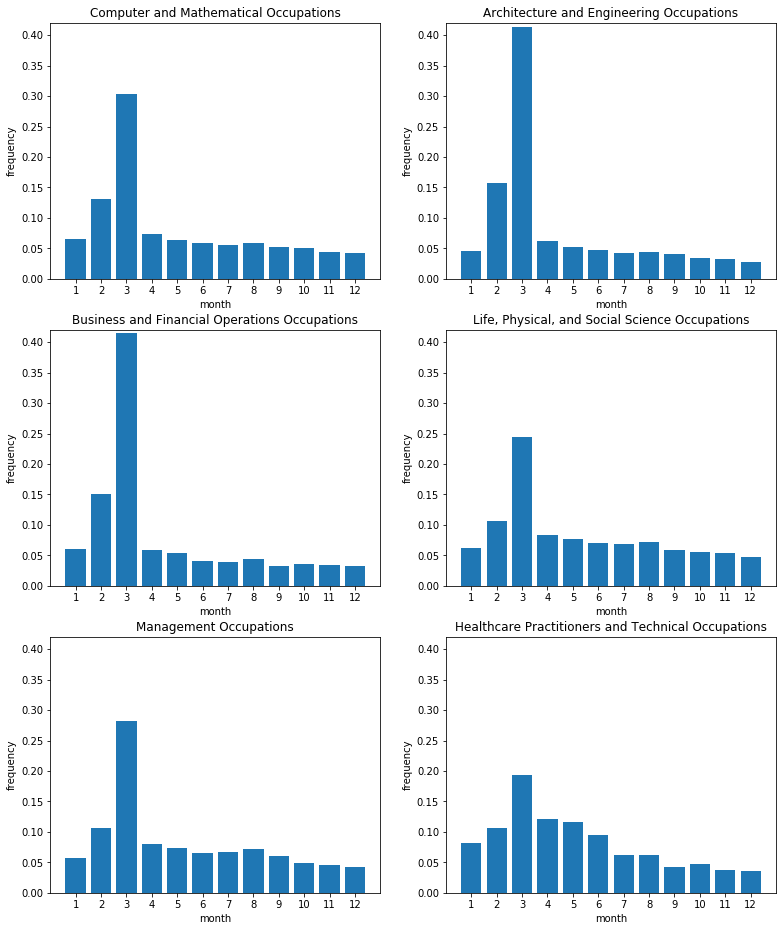

In [50]:
plt.figure(figsize = (13,16))
for i in range(len(industry_top)):
    plt.subplot(3,2,i+1)
    clean_new = clean_socright[clean_socright['INDUSTRY_CODE'] == industry_top[i]]['CASE_SUBMITTED_MONTH'].value_counts(normalize = True).reset_index()
    clean_new.columns = ["month","frequency"]
    clean_new = clean_new.sort_values('month')
    plt.bar(clean_new['month'].astype(str), clean_new['frequency'])
    #clean_new.plot(kind='bar',x='month',y='frequency')
    plt.ylim(0,0.42)
    plt.xlabel("month")
    plt.ylabel("frequency")
    plt.title(industry_top_name[i])

From the graphs of the top 6 categories of occupations, we can see that the patterns for the time of application submission are very similar. Most of the applications are submitted during the first half of the year, and the largest number of submissions happen in March. 

Therefore, from what we observed from the time patterns of H1-B applications submissions above, most companies apply H1-B in March. This probably indicates that newly-graduated international students should try to get a job before March, so that they won't miss the H1-B application process in most companies. Another interpretation for the peak in March is that, when international students graduate during May (semester system) or June (quarter system), they are granted a 24-month extension on their stay at the US with OPT Visa. When time approaches March of the year after their graduation, usually they have to find a job at US, or their OPT Visa will expire. This may help explain why the applications are concentrated in March as shown above.